<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Gathering-data" data-toc-modified-id="Gathering-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Gathering data</a></span></li><li><span><a href="#Preparing-the-data---cleaning-and-exploration" data-toc-modified-id="Preparing-the-data---cleaning-and-exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preparing the data - cleaning and exploration</a></span><ul class="toc-item"><li><span><a href="#Title-column" data-toc-modified-id="Title-column-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Title column</a></span></li><li><span><a href="#Age-column" data-toc-modified-id="Age-column-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Age column</a></span></li><li><span><a href="#Fare-column" data-toc-modified-id="Fare-column-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Fare column</a></span></li><li><span><a href="#Sex-column" data-toc-modified-id="Sex-column-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Sex column</a></span></li><li><span><a href="#Embarked-column" data-toc-modified-id="Embarked-column-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Embarked column</a></span></li><li><span><a href="#FamilySize-and-IsAlone-columns" data-toc-modified-id="FamilySize-and-IsAlone-columns-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>FamilySize and IsAlone columns</a></span></li><li><span><a href="#Cabin-column" data-toc-modified-id="Cabin-column-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Cabin column</a></span></li><li><span><a href="#Other-columns" data-toc-modified-id="Other-columns-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Other columns</a></span></li><li><span><a href="#Select-features" data-toc-modified-id="Select-features-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Select features</a></span></li></ul></li><li><span><a href="#Choosing-a-model" data-toc-modified-id="Choosing-a-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Choosing a model</a></span></li><li><span><a href="#Training-models" data-toc-modified-id="Training-models-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Training models</a></span></li><li><span><a href="#Evaluating-models" data-toc-modified-id="Evaluating-models-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Evaluating models</a></span></li><li><span><a href="#Hyperparameter-Tuning" data-toc-modified-id="Hyperparameter-Tuning-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Hyperparameter Tuning</a></span><ul class="toc-item"><li><span><a href="#Tuning-with-RandomizedSearchCV" data-toc-modified-id="Tuning-with-RandomizedSearchCV-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Tuning with RandomizedSearchCV</a></span></li><li><span><a href="#Tuning-with-GridSearchCV" data-toc-modified-id="Tuning-with-GridSearchCV-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Tuning with GridSearchCV</a></span><ul class="toc-item"><li><span><a href="#GradientBoostingClassifier" data-toc-modified-id="GradientBoostingClassifier-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>GradientBoostingClassifier</a></span></li><li><span><a href="#XGBClassifier" data-toc-modified-id="XGBClassifier-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>XGBClassifier</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-6.2.3"><span class="toc-item-num">6.2.3&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li></ul></li></ul></li><li><span><a href="#Making-Predictions" data-toc-modified-id="Making-Predictions-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Making Predictions</a></span></li></ul></div>

# Gathering data

First load the training and test data in two separate DataFrames.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib.pyplot import plot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combined = [train_df,test_df]
combined_df = pd.concat(combined, sort=False)

# Preparing the data - cleaning and exploration

Let's have a look at the 5 first rows.

In [3]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


And display some statistics about numerical columns.

In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Let's see how many missing data we have.

In [5]:
combined_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

## Title column

Here I will create a function to create a Title column extracted from the Name column, replace some synonyms, and finally change all titles with less than 10 occurences by 'Misc'.

In [6]:
def create_title_column(dataframe):
    dataframe['Title'] = dataframe['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
    dataframe['Title'] = dataframe['Title'].replace('Mlle', 'Miss')
    dataframe['Title'] = dataframe['Title'].replace('Ms', 'Miss')
    dataframe['Title'] = dataframe['Title'].replace('Mme', 'Mrs')
    
    stat_min = 10 #while small is arbitrary, we'll use the common minimum in statistics: http://nicholasjjackson.com/2012/03/08/sample-size-is-10-a-magic-number/
    title_names = (dataframe['Title'].value_counts() < stat_min) #this will create a true false series with title name as index
    #apply and lambda functions are quick and dirty code to find and replace with fewer lines of code: https://community.modeanalytics.com/python/tutorial/pandas-groupby-and-python-lambda-functions/
    dataframe['Title'] = dataframe['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
    
    return dataframe['Title']

In [7]:
for df in combined:
    df['Title'] = create_title_column(df)

print(train_df['Title'].value_counts())

Mr        517
Miss      185
Mrs       126
Master     40
Misc       23
Name: Title, dtype: int64


Finally the column is converted as a numerical categorical column (Master=0, Misc=1, Miss=2, Mr=3, Mrs=4).

In [8]:
for df in combined:
    df['Title'] = pd.Categorical(df['Title']).codes
    
print(train_df['Title'].value_counts())

3    517
2    185
4    126
0     40
1     23
Name: Title, dtype: int64


## Age column

There are 263 persons with missing Age. We'll fill the missing values with some mean...  
But let's first explore how the age is distributed across Pclass and if there's any difference between male and female:

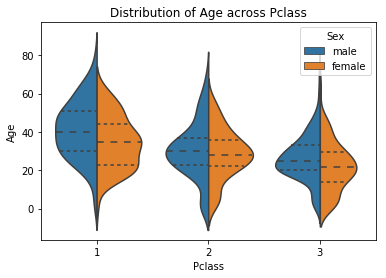

In [9]:
plot = sns.violinplot('Pclass', 'Age', data=train_df, inner='quartile', hue='Sex', split=True)
plot_title = plot.set_title('Distribution of Age across Pclass')

The higher the Pclass, the higher the age. But there's no big difference between male and female.  
So we'll replace missing values with the mean age of the appropriate Pclass.

In [10]:
mean_age_by_pclass = combined_df.groupby('Pclass').mean()['Age']
mean_age_by_pclass

Pclass
1    39.159930
2    29.506705
3    24.816367
Name: Age, dtype: float64

In [11]:
def compute_age(row):
    if pd.isnull(row['Age']):
        return mean_age_by_pclass[row['Pclass']]
    return row['Age']

In [12]:
for df in combined:
    df["Age"] = df.apply(compute_age, axis=1)

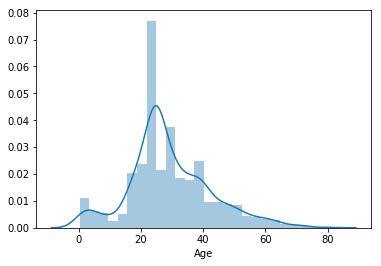

In [13]:
sns.distplot(train_df['Age'])

Continuous values like Age are usually more difficult from predictive modeling point of view.  
So we will convert the column to bins.  
But before we do that, we create a new column that will inform us if a given person is a child or not: _women and children first_.

In [14]:
for df in combined:
    df['IsChild'] = df['Age']<15

In [15]:
def get_quantile_based_boundaries(feature_values, num_buckets):
  boundaries = np.arange(1.0, num_buckets) / num_buckets
  quantiles = feature_values.quantile(boundaries)
  return [quantiles[q] for q in quantiles.keys()]

In [16]:
def compute_band(row, column_name, boundaries):
    i=0
    for boundary in boundaries:
        if row[column_name] < boundary:
            return i
        i=i+1
    return len(boundaries)

As I don't know yet how many bins I want, I'll create multiple columns with different bins size.

In [17]:
for i in np.arange(3, 6):
    age_boundaries = get_quantile_based_boundaries(combined_df.Age, i)
    for df in combined:
        df["Age_band_" + str(i)] = df.apply(lambda row : compute_band(row, 'Age', age_boundaries), axis=1)

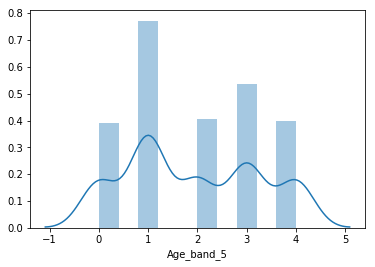

In [18]:
sns.distplot(train_df.Age_band_5)

## Fare column

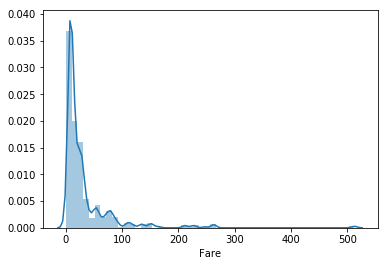

In [19]:
sns.distplot(train_df.Fare)

There's one missing fare, so we'll fill it with the mean fare given Pclass. 

In [20]:
missing_fare = test_df[test_df['Fare'].isna()]
missing_fare

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,IsChild,Age_band_3,Age_band_4,Age_band_5
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,3,False,2,3,4


In [21]:
fare_groupby_pclass = combined_df.groupby('Pclass').mean()['Fare']
fare_groupby_pclass

Pclass
1    87.508992
2    21.179196
3    13.302889
Name: Fare, dtype: float64

In [22]:
mean_fare_for_Pclass3 = fare_groupby_pclass.loc[missing_fare.iloc[0].Pclass]
test_df['Fare'].fillna(mean_fare_for_Pclass3, inplace=True)

For the same reason than Agen, we will create 5 bands of Fare.

In [23]:
for i in np.arange(3, 6):
    fare_boundaries = get_quantile_based_boundaries(combined_df.Fare, i)
    for df in combined:
        df["Fare_band_" + str(i)] = df.apply(lambda row : compute_band(row, 'Fare', fare_boundaries), axis=1)

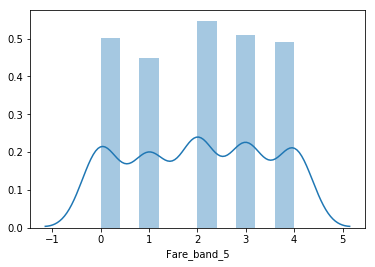

In [24]:
sns.distplot(train_df.Fare_band_5)

## Sex column

Let's convert the Sex column to be numerical.

In [25]:
train_df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [26]:
for df in combined:
    df.Sex = pd.get_dummies(df.Sex, drop_first=True)

In [27]:
train_df.Sex.value_counts()

1    577
0    314
Name: Sex, dtype: int64

## Embarked column

First fill empty values with the most frequent embarked.  
Then convert the column to be numerical.

In [28]:
train_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [29]:
freq_port = df.Embarked.dropna().mode()[0]

for df in combined:
    df.Embarked.fillna(freq_port, inplace=True)
    df.Embarked = pd.Categorical(df.Embarked).codes

In [30]:
train_df.Embarked.value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

## FamilySize and IsAlone columns

Let's create two new columns:
- FamilySize is the sum of SibSp and Parch + 1 (the person itself)
- IsAlone: whether this person has embarked alone or with his family

In [31]:
for df in combined:
    df['FamilySize'] = df.SibSp + df.Parch + 1
    df['IsAlone'] = ((df.SibSp + df.Parch)==0)*1

## Cabin column

Here I will extract some information that may be intersting from the Cabin column: the letter of the cabin, its number, and whether it's odd or not.

In [32]:
import re
def extract_cabin_nr(cabin):
    """ Extracts the cabin number.  If there no number found, return NaN """
    if not pd.isnull(cabin):
        cabin = cabin.split(' ')[-1]    # if several cabins on ticket, take last one
        re_numb = r'[A-Z]([0-9]+)'
        try:
            number = int(re.findall(re_numb, cabin)[0])
            return number
        except:
            return np.nan
    else:
        return np.nan

In [33]:
def extract_cabin_letter(cabin):
    """ Extracts the cabin letter.  If there no letter found, return NaN """
    if not pd.isnull(cabin):
        cabin = cabin.split(' ')[-1]    # if several cabins on ticket, take last one
        re_char = r'([A-Z])[0-9]+'
        try:
            character = re.findall(re_char, cabin)[0]
            return character
        except:
            return np.nan
    else:
        return np.nan

In [34]:
for df in combined:
    df['Cabin_char'] = list(map(extract_cabin_letter, df['Cabin']))
    df['Cabin_nr'] = list(map(extract_cabin_nr, df['Cabin']))
    df['Cabin_nr_odd'] = df.Cabin_nr.apply(lambda x: np.nan if x == np.nan else x%2)
    
    # deal with the NaN's in some of our newly created columns
    df['Cabin_char'].fillna(value=-9999, inplace=True)
    df['Cabin_nr'].fillna(value=-9999, inplace=True)
    df['Cabin_nr_odd'].fillna(value=-9999, inplace=True)

## Other columns
Let's drop the columns we don't need anymore.

In [35]:
train_df = train_df.drop(['Name','Cabin','Ticket','Fare','Age'], 1)

In [36]:
train_df = pd.get_dummies(train_df, drop_first=True)
train_df.describe()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,Age_band_3,Age_band_4,...,IsAlone,Cabin_nr,Cabin_nr_odd,Cabin_char_A,Cabin_char_B,Cabin_char_C,Cabin_char_D,Cabin_char_E,Cabin_char_F,Cabin_char_G
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.00000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,0.523008,0.381594,1.536476,2.747475,1.056117,1.499439,...,0.602694,-7743.141414,-7754.454545,0.016835,0.052750,0.066218,0.03367,0.037037,0.010101,0.007856
std,257.353842,0.486592,0.836071,0.477990,1.102743,0.806057,0.791503,0.890765,0.756392,1.058274,...,0.489615,4195.494912,4174.421322,0.128725,0.223659,0.248802,0.18048,0.188959,0.100051,0.088337
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-9999.000000,-9999.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,1.000000,...,0.000000,-9999.000000,-9999.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,1.000000,0.000000,0.000000,2.000000,3.000000,1.000000,1.000000,...,1.000000,-9999.000000,-9999.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,1.000000,0.000000,2.000000,3.000000,2.000000,2.000000,...,1.000000,-9999.000000,-9999.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,891.000000,1.000000,3.000000,1.000000,8.000000,6.000000,2.000000,4.000000,2.000000,3.000000,...,1.000000,148.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


## Select features

I have tried many different selection of features in the models I tested.  
I also explored Feature ranking with recursive feature elimination and cross-validated selection of the best number of features with [RFECV](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html).  
I finally selected a mix between my feeling and what RFECV has proposed.

In [37]:
X = np.array(train_df.drop(['Survived','PassengerId'], 1))
training_features = np.array(train_df.drop(['Survived','PassengerId'], 1).columns)
y = np.array(train_df['Survived'])

I need my first classifier to explorer feature ranking.  
Machine learning is an iterative process so here I'll use the classifier that I used for my the best submission: [XGBClassifier](https://xgboost.readthedocs.io/en/latest/python/python_api.html)

In [38]:
from sklearn import model_selection
import xgboost as xgb

clf = xgb.XGBClassifier(verbose=1)
#for i in np.arange(3, 21):
cv = model_selection.StratifiedKFold(n_splits=6, shuffle=True, random_state=1)
scores = model_selection.cross_val_score(clf, X, y, cv=cv, n_jobs=-1, scoring='accuracy', verbose=1)
clf.fit(X,y)
print('n_split=' + str(i))
print(scores)
print('Accuracy: %.3f stdev: %.3f' % (np.mean(np.abs(scores)), np.std(scores)))
print()


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    4.4s finished


n_split=5
[0.85234899 0.83892617 0.82550336 0.87162162 0.83108108 0.80405405]
Accuracy: 0.837 stdev: 0.021



In [39]:
from sklearn.feature_selection import RFECV

print("features used during training: ")
print(training_features)
print("")

featselect = RFECV(estimator=clf, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)
featselect.fit(X,y)

print("features proposed by RFECV: "),
print(training_features[featselect.support_])

features used during training: 
['Pclass' 'Sex' 'SibSp' 'Parch' 'Embarked' 'Title' 'IsChild' 'Age_band_3'
 'Age_band_4' 'Age_band_5' 'Fare_band_3' 'Fare_band_4' 'Fare_band_5'
 'FamilySize' 'IsAlone' 'Cabin_nr' 'Cabin_nr_odd' 'Cabin_char_A'
 'Cabin_char_B' 'Cabin_char_C' 'Cabin_char_D' 'Cabin_char_E'
 'Cabin_char_F' 'Cabin_char_G']

Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
features proposed by RFECV: 
['Pclass' 'Sex' 'SibSp' 'Parch' 'Embarked' 'Title' 'IsChild' 'Age_band_3'
 'Age_band_4' 'Age_band_5' 'Fare_band_3' 'Fare_band_4' 'Fare_band_5'
 'FamilySize' 'IsAlone' 'Cabin_nr' 'Cabin_nr_odd' 'Cabin_char_B'
 'Cabin_char_C' 'Cabin_char_D' 'Cabin_char_E']


In [40]:
#features = ['Pclass', 'Sex', 'Age', 'IsAlone', 'Fare', 'Embarked', 'Title', 'Cabin_nr']
features = ['Pclass','Sex', 'IsChild', 'Age_band_5', 'Fare_band_4', 'Fare_band_5', 'Title', 'FamilySize', 'Cabin_nr']

# Choosing a model

The goal of this project is to have a first real experience in machine learning, python, sklearn and try many different classifiers.  
So let's create an algorithm that will try many different classifiers, and try many different hyper parameters thanks to [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).  
This algorithm will also record the scores and best parameters for every classifier.

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [42]:
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

Here are the hyper parameters and their tested values:

In [44]:
n_estimators = [10,50,100,200,400]
n_neighbors = [3,4,5,6]
learning_rates = [1.0, 0.3, 0.1, 0.03, 0.01, 0.005, 0.003]
criterion = ['gini', 'entropy']
max_features = ['log2', 'sqrt','auto']
hidden_layer_sizes = [(100,), (100,100), (50,100,50)]
C = [0.1, 1, 3, 10, 30, 100]
gamma = [1, 0.3, 0.1, 0.03, 0.01, 0.001]
max_depth = [2, 3, 4]
reg_lambda = [0.50]
loss = ['deviance', 'exponential']

And the many classifiers I give a try with their hyper parameters:

In [45]:
models_and_grid_params = [
    #(SGDClassifier, {'penalty': ['l2', 'l1']}),
    (xgb.XGBClassifier, {'n_estimators': n_estimators, 'learning_rate': learning_rates, 'max_depth': max_depth, 'reg_lambda': reg_lambda}),
    (AdaBoostClassifier, {'n_estimators': n_estimators, 'learning_rate': learning_rates}),
    #(ExtraTreesClassifier, {'n_estimators': n_estimators}),
    (GradientBoostingClassifier,{'loss': loss, 'learning_rate': learning_rates}), 
    (RandomForestClassifier, {'n_estimators': n_estimators, 'criterion': criterion,'max_features': max_features}),
    #(KNeighborsClassifier, {'n_neighbors': n_neighbors}),
    #(MLPClassifier,{'hidden_layer_sizes': hidden_layer_sizes}),
                   #(SVC,{'C': C, 'gamma': gamma}),
                   #(GaussianProcessClassifier,{}),
                   (DecisionTreeClassifier,{})
                   #(GaussianNB,{})
                   ]

scores = pd.DataFrame(columns=['Model', 'Estimator', 'Trial', 'Best Params', 'Accuracy Score'])

# Training models

Here I split training data into random train (60%) and test subsets (40%). The test subset will be used to evaluate how the classifier can generalize with unseen data.

In [46]:
X_train, X_test, y_train, y_test = train_test_split(train_df[features], train_df['Survived'], test_size=0.4, random_state=42)

Define train_model function that will create a given model, and search for the best parameters across a given param_grid.
It appends the results to the scores dataframe for later evaluation.

In [47]:
def train_model(estimator_class, param_grid, scores, X_train, X_test, y_train, y_test, verbose=0):
    estimator = estimator_class()
    
    if verbose==1:
        print('Training ' + type(estimator).__name__ + '...')
    
    
    cv = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

    model = GridSearchCV(estimator, param_grid, refit=True, cv=cv, scoring='accuracy', verbose=verbose, n_jobs=-1)
    model.fit(X_train,y_train)
    #pred = model.predict(X_test)
    
    #accuracy = round(model.score(X_test, y_test) * 100, 3)
    trial_row = scores[scores['Model']==type(estimator).__name__]
    trial = 1
    if not trial_row.empty:
        trial = int(trial_row['Trial'].max()) + 1
    scores = scores.append({'Model' : type(estimator).__name__, 
                            'Estimator' : model.best_estimator_, 
                            'Trial': trial,
                            'Best Params': str(model.best_params_),
                            'Accuracy Score': round(model.best_score_*100,3) #accuracy
                           }, ignore_index=True)
    
    return scores, model.best_estimator_, model.best_params_, round(model.best_score_*100,3)

In [48]:
def print_results(model, params, accuracy, scores=None):
    print(type(model).__name__ + ' works best (' + str(accuracy) + '%) with ' + str(params))
    if not scores is None:
        scores = scores.sort_values('Accuracy Score', ascending=False)
    return scores

Now let's train all the models:

In [49]:
for model_class, param_grid in models_and_grid_params:
    scores, best_model, best_params, accuracy = train_model(model_class, param_grid, scores, X_train, X_test, y_train, y_test, verbose=1)
    print_results(best_model, best_params, accuracy)

Training XGBClassifier...
Fitting 5 folds for each of 105 candidates, totalling 525 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 525 out of 525 | elapsed:   11.5s finished
C:\Users\lange\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


XGBClassifier works best (84.831%) with {'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 400, 'reg_lambda': 0.5}
Training AdaBoostClassifier...
Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:   11.7s finished
C:\Users\lange\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


AdaBoostClassifier works best (83.708%) with {'learning_rate': 0.1, 'n_estimators': 100}
Training GradientBoostingClassifier...
Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


GradientBoostingClassifier works best (84.27%) with {'learning_rate': 0.03, 'loss': 'exponential'}
Training RandomForestClassifier...
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 135 out of 150 | elapsed:    8.1s remaining:    0.8s


RandomForestClassifier works best (81.835%) with {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 50}
Training DecisionTreeClassifier...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
DecisionTreeClassifier works best (80.337%) with {}


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    9.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


# Evaluating models

The dataframe below shows the best results for the trained models, with the highest score on top.

In [50]:
def print_scores(scores):
    return scores.sort_values('Accuracy Score', ascending=False)

In [51]:
print_scores(scores)

,Model,Estimator,Trial,Best Params,Accuracy Score
0,XGBClassifier,"XGBClassifier(base_score=0.5, booster='gbtree'...",1,"{'learning_rate': 0.03, 'max_depth': 4, 'n_est...",84.831
2,GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,1,"{'learning_rate': 0.03, 'loss': 'exponential'}",84.270
1,AdaBoostClassifier,"(DecisionTreeClassifier(class_weight=None, cri...",1,"{'learning_rate': 0.1, 'n_estimators': 100}",83.708
3,RandomForestClassifier,"(DecisionTreeClassifier(class_weight=None, cri...",1,"{'criterion': 'entropy', 'max_features': 'log2...",81.835
4,DecisionTreeClassifier,"DecisionTreeClassifier(class_weight=None, crit...",1,{},80.337


# Hyperparameter Tuning

## Tuning with RandomizedSearchCV

In [52]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1900, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
criterion = ['gini', 'entropy']

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'criterion': criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'criterion': ['gini', 'entropy'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 300, 500, 700, 900, 1100, 1300, 1500, 1700, 1900]}


In [53]:
rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, n_iter = 200, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   58.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  3.6min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=200, n_jobs=-1,
          param_distributions={'n_estimators': [100, 300, 500, 700, 900, 1100, 1300, 1500, 1700, 1900], 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn'

In [54]:
print('The best parameters after tuning are: ')
print()
pprint(rf_random.best_params_)

print()
best_model = rf_random.best_estimator_
old_score = float(scores[scores['Model']==type(best_model).__name__]['Accuracy Score'])
rf_random_score = round(best_model.score(X_test, y_test) * 100, 2)
print('Final Score on validation data: ' + str(rf_random_score) + '% (+' + str(round(rf_random_score-old_score,2)) + '%)')

The best parameters after tuning are: 

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 40,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 900}

Final Score on validation data: 84.03% (+2.2%)


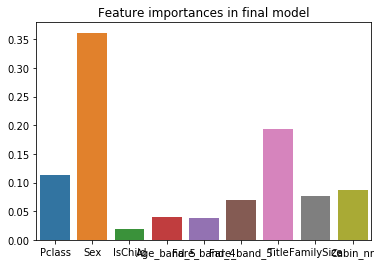

In [55]:
feature_importances_df = pd.DataFrame(best_model.feature_importances_).transpose()
feature_importances_df.columns = features
axes = sns.barplot(data=feature_importances_df)
_ = axes.set_title('Feature importances in final model')

## Tuning with GridSearchCV

### GradientBoostingClassifier

In [56]:
learning_rates = [0.12, 0.11, 0.1, 0.09, 0.08]
max_depth = [3,5,8]
loss = ['deviance', 'exponential']

tuned_param_grid = {'learning_rate': learning_rates, 'loss': loss, 'max_depth': max_depth,
    "min_samples_split": np.linspace(0.1, 0.5, 6),
    "min_samples_leaf": np.linspace(0.1, 0.5, 6),
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"]}


In [57]:
scores, gb_tuned, gb_tuned_params, gb_accuracy = train_model(GradientBoostingClassifier, tuned_param_grid, scores, X_train, X_test, y_train, y_test, verbose=1)

Training GradientBoostingClassifier...
Fitting 5 folds for each of 4320 candidates, totalling 21600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 2452 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done 3552 tasks      | elapsed:   49.8s
[Parallel(n_jobs=-1)]: Done 4852 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 6352 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 8052 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 9952 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 11547 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 12697 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 13947 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 15297 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 16747 tasks  

In [58]:
print_results(gb_tuned, gb_tuned_params, gb_accuracy, scores)

GradientBoostingClassifier works best (82.584%) with {'criterion': 'friedman_mse', 'learning_rate': 0.12, 'loss': 'deviance', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 0.1, 'min_samples_split': 0.42000000000000004}


,Model,Estimator,Trial,Best Params,Accuracy Score
0,XGBClassifier,"XGBClassifier(base_score=0.5, booster='gbtree'...",1,"{'learning_rate': 0.03, 'max_depth': 4, 'n_est...",84.831
2,GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,1,"{'learning_rate': 0.03, 'loss': 'exponential'}",84.270
1,AdaBoostClassifier,"(DecisionTreeClassifier(class_weight=None, cri...",1,"{'learning_rate': 0.1, 'n_estimators': 100}",83.708
5,GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,2,"{'criterion': 'friedman_mse', 'learning_rate':...",82.584
3,RandomForestClassifier,"(DecisionTreeClassifier(class_weight=None, cri...",1,"{'criterion': 'entropy', 'max_features': 'log2...",81.835
4,DecisionTreeClassifier,"DecisionTreeClassifier(class_weight=None, crit...",1,{},80.337


### XGBClassifier

In [59]:
n_estimators = [8,10,11,12,13,14] #,100,200]
learning_rates = [0.3, 0.25, 0.2, 0.15, 0.1] #, 0.05, 0.03]
max_depth = [3]
reg_lambda = [.43, .44, .45, .46,.47, .48]
colsample_bytree = [.8, .9, 1]
reg_alpha = [0] #, 1e-06, 1e-07] #, 0.002, 0.003] #, 0.004, 0.005, 0.01]
booster = ['gbtree'] #, 'gblinear', 'dart']

tuned_param_grid = {'n_estimators': n_estimators, 'learning_rate': learning_rates, 'max_depth': max_depth, 
                    'reg_lambda': reg_lambda, 'reg_alpha': reg_alpha,
                    'colsample_bytree': colsample_bytree, 'booster': booster
                   }

pprint(tuned_param_grid)

{'booster': ['gbtree'],
 'colsample_bytree': [0.8, 0.9, 1],
 'learning_rate': [0.3, 0.25, 0.2, 0.15, 0.1],
 'max_depth': [3],
 'n_estimators': [8, 10, 11, 12, 13, 14],
 'reg_alpha': [0],
 'reg_lambda': [0.43, 0.44, 0.45, 0.46, 0.47, 0.48]}


In [60]:
scores, xgb_tuned, xgb_tuned_params, xgb_accuracy = train_model(xgb.XGBClassifier, tuned_param_grid, scores, X_train, X_test, y_train, y_test, verbose=1)

Training XGBClassifier...
Fitting 5 folds for each of 540 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed:   10.6s finished
C:\Users\lange\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [61]:
print_results(xgb_tuned, xgb_tuned_params, xgb_accuracy, scores)

XGBClassifier works best (84.644%) with {'booster': 'gbtree', 'colsample_bytree': 0.9, 'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 12, 'reg_alpha': 0, 'reg_lambda': 0.45}


,Model,Estimator,Trial,Best Params,Accuracy Score
0,XGBClassifier,"XGBClassifier(base_score=0.5, booster='gbtree'...",1,"{'learning_rate': 0.03, 'max_depth': 4, 'n_est...",84.831
6,XGBClassifier,"XGBClassifier(base_score=0.5, booster='gbtree'...",2,"{'booster': 'gbtree', 'colsample_bytree': 0.9,...",84.644
2,GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,1,"{'learning_rate': 0.03, 'loss': 'exponential'}",84.270
1,AdaBoostClassifier,"(DecisionTreeClassifier(class_weight=None, cri...",1,"{'learning_rate': 0.1, 'n_estimators': 100}",83.708
5,GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,2,"{'criterion': 'friedman_mse', 'learning_rate':...",82.584
3,RandomForestClassifier,"(DecisionTreeClassifier(class_weight=None, cri...",1,"{'criterion': 'entropy', 'max_features': 'log2...",81.835
4,DecisionTreeClassifier,"DecisionTreeClassifier(class_weight=None, crit...",1,{},80.337


### RandomForestClassifier

In [62]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1000, stop = 1600, num = 7)]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.arange(16,23)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.arange(9,12)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1]
# Method of selecting samples for training each tree
bootstrap = [True]
criterion = ['entropy']

tuned_param_grid = {'n_estimators': n_estimators,
               'criterion': criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(tuned_param_grid)

{'bootstrap': [True],
 'criterion': ['entropy'],
 'max_depth': [16, 17, 18, 19, 20, 21, 22, None],
 'max_features': ['sqrt'],
 'min_samples_leaf': [1],
 'min_samples_split': [9, 10, 11],
 'n_estimators': [1000, 1100, 1200, 1300, 1400, 1500, 1600]}


In [63]:
scores, rf_tuned, rf_tuned_params, rf_accuracy = train_model(RandomForestClassifier, tuned_param_grid, scores, X_train, X_test, y_train, y_test, verbose=1)

Training RandomForestClassifier...
Fitting 5 folds for each of 168 candidates, totalling 840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 840 out of 840 | elapsed:  6.8min finished


In [64]:
print_results(rf_tuned, rf_tuned_params, rf_accuracy, scores)

RandomForestClassifier works best (84.082%) with {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 11, 'n_estimators': 1100}


,Model,Estimator,Trial,Best Params,Accuracy Score
0,XGBClassifier,"XGBClassifier(base_score=0.5, booster='gbtree'...",1,"{'learning_rate': 0.03, 'max_depth': 4, 'n_est...",84.831
6,XGBClassifier,"XGBClassifier(base_score=0.5, booster='gbtree'...",2,"{'booster': 'gbtree', 'colsample_bytree': 0.9,...",84.644
2,GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,1,"{'learning_rate': 0.03, 'loss': 'exponential'}",84.270
7,RandomForestClassifier,"(DecisionTreeClassifier(class_weight=None, cri...",2,"{'bootstrap': True, 'criterion': 'entropy', 'm...",84.082
1,AdaBoostClassifier,"(DecisionTreeClassifier(class_weight=None, cri...",1,"{'learning_rate': 0.1, 'n_estimators': 100}",83.708
5,GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,2,"{'criterion': 'friedman_mse', 'learning_rate':...",82.584
3,RandomForestClassifier,"(DecisionTreeClassifier(class_weight=None, cri...",1,"{'criterion': 'entropy', 'max_features': 'log2...",81.835
4,DecisionTreeClassifier,"DecisionTreeClassifier(class_weight=None, crit...",1,{},80.337


# Making Predictions

In [66]:
scores.groupby('Model', as_index=False).max().sort_values('Accuracy Score', ascending=False)

,Model,Trial,Best Params,Accuracy Score
4,XGBClassifier,2,"{'learning_rate': 0.03, 'max_depth': 4, 'n_est...",84.831
2,GradientBoostingClassifier,2,"{'learning_rate': 0.03, 'loss': 'exponential'}",84.270
3,RandomForestClassifier,2,"{'criterion': 'entropy', 'max_features': 'log2...",84.082
0,AdaBoostClassifier,1,"{'learning_rate': 0.1, 'n_estimators': 100}",83.708
1,DecisionTreeClassifier,1,{},80.337


In [71]:
best_model = xgb_tuned

In [72]:
y_pred_test = best_model.predict(X_test)
y_pred_valid = best_model.predict(test_df[features])
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": y_pred_valid
    })
submission.to_csv('submission.csv', index=False)

In [74]:
from sklearn import metrics

In [75]:
print('Train set')
print(metrics.classification_report(y_train, best_model.predict(X_train)))
print('Test set')
print(metrics.f1_score(y_test, y_pred_test))

Train set
              precision    recall  f1-score   support

           0       0.85      0.94      0.90       333
           1       0.89      0.73      0.80       201

   micro avg       0.86      0.86      0.86       534
   macro avg       0.87      0.84      0.85       534
weighted avg       0.87      0.86      0.86       534

Test set
0.7662835249042146
